<a href="https://colab.research.google.com/github/DacioSB/DataScience/blob/master/IntroDataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisando as notas em geral

In [2]:
import pandas as pd

notas = pd.read_csv("Alura/ratings.csv")
notas.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
notas['rating'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [4]:
notas['rating'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

In [5]:
notas['rating'].mean()

3.501556983616962

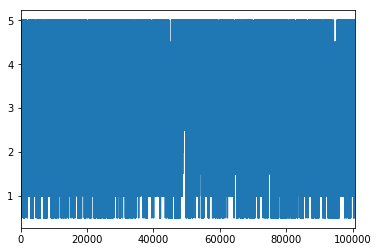

In [6]:
notas.rating.plot()

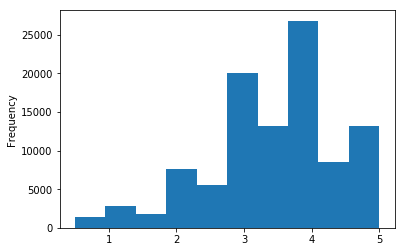

In [7]:
notas.rating.plot(kind = 'hist')

In [8]:
print("Média",notas['rating'].mean())
print("Mediana",notas['rating'].median())

Média 3.501556983616962
Mediana 3.5


In [9]:
notas.rating.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

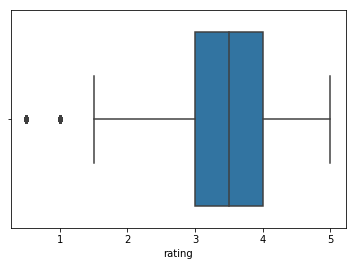

In [10]:
import seaborn as sns

sns.boxplot(notas.rating)

# Analisando os filmes

In [11]:
import pandas as pd
filmes = pd.read_csv("Alura/movies.csv")
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Analisando algumas notas específicas por filme

In [12]:
filmes.columns = ["filmeId", "titulo", "generos"]
notas.query("movieId == 1").rating.mean()

3.9209302325581397

In [13]:
notas.query("movieId == 2").rating.mean()

3.4318181818181817

In [14]:
notas.groupby("movieId")

In [0]:
medias_por_filme = notas.groupby("movieId").mean()["rating"]
#agrupando cada filme por id e tirando a media

In [16]:
medias_por_filme.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

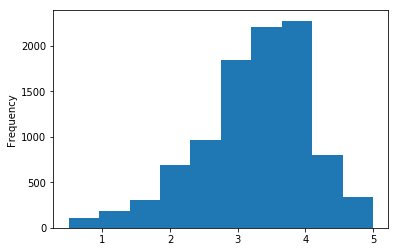

In [17]:
medias_por_filme.plot(kind="hist")

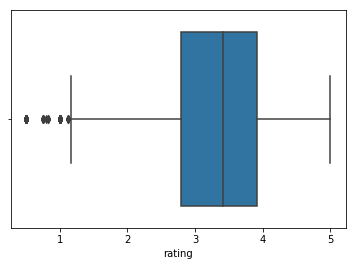

In [18]:
sns.boxplot(medias_por_filme)

In [19]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: rating, dtype: float64

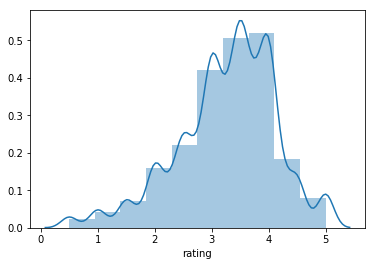

In [20]:
sns.distplot(medias_por_filme, bins = 10)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

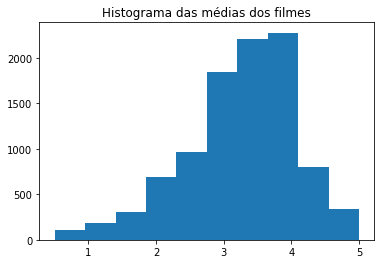

In [21]:
import matplotlib.pyplot as plt
#Essa é a biblioteca que o pandas importa pra plotar os dados
plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")


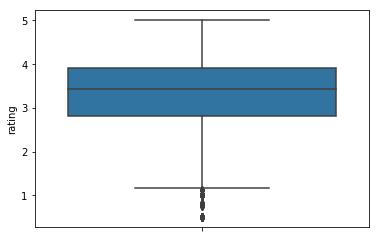

In [22]:
sns.boxplot(y=medias_por_filme)
#Costuma se plotar na vertical

#Analisando TMDB

In [23]:
tmdb = pd.read_csv("Alura/tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [24]:
tmdb['original_language'].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

#Data Visualization

In [0]:
contagem_lingua = tmdb.original_language.value_counts().to_frame().reset_index()
#Depois da o barplot do seaborn, mas tive que fazer isso tudo pra chamar o barplot, trabalhoso!

In [0]:
contagem_lingua.columns = ["languages", "frequency"]

In [27]:
contagem_lingua.head()

,languages,frequency
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


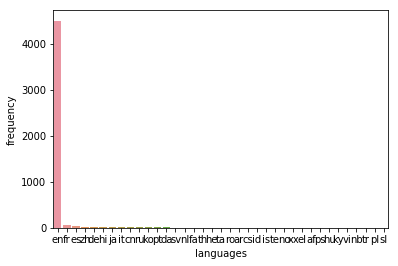

In [28]:
#Usa se entao o catplot
sns.barplot(x = "languages", y = "frequency", data = contagem_lingua)

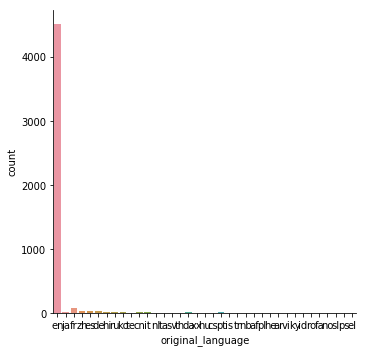

In [29]:
sns.catplot(x = "original_language", kind = "count", data = tmdb)

([<matplotlib.patches.Wedge at 0x7fa026c34860>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

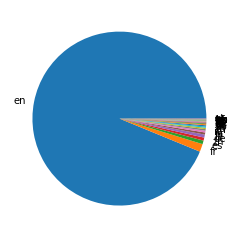

In [30]:
plt.pie(contagem_lingua["frequency"], labels = contagem_lingua["languages"])
#Grafico de pizza, ineficiente para esse tipo de necessidade

In [31]:
total_por_lingua = tmdb["original_language"].value_counts()
total_ingles = total_por_lingua.loc["en"]
total_geral = total_por_lingua.sum()
total_resto = total_geral - total_ingles
print(total_ingles, total_resto)
#Assim, temos duas categorias: ingles e outros

4505 298


In [32]:
#Criando dicionario
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_ingles, total_resto]
}

pd.DataFrame(dados)

,lingua,total
0,ingles,4505
1,outros,298


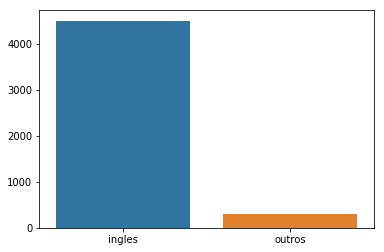

In [33]:
sns.barplot(x = 'lingua', y = 'total', data = dados)

In [34]:
tmdb.query("original_language != 'en'")

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
97,15000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,315011,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 7671,...",ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,9.476999,"[{""name"": ""Cine Bazar"", ""id"": 5896}, {""name"": ...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",2016-07-29,77000000,120.0,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",Released,A god incarnate. A city doomed.,Shin Godzilla,6.5,143
235,97250400,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...",http://www.asterixauxjeuxolympiques.com/index.php,2395,"[{""id"": 271, ""name"": ""competition""}, {""id"": 12...",fr,Astérix aux Jeux Olympiques,Astérix and Obélix have to win the Olympic Gam...,20.344364,"[{""name"": ""Constantin Film"", ""id"": 47}, {""name...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2008-01-13,132900000,116.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,NaN,Asterix at the Olympic Games,5.0,471
317,94000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",http://www.theflowersofwarmovie.com/,76758,"[{""id"": 173251, ""name"": ""forced prostitution""}...",zh,金陵十三釵,A Westerner finds refuge with a group of women...,12.516546,"[{""name"": ""Beijing New Picture Film Co. Ltd."",...","[{""iso_3166_1"": ""CN"", ""name"": ""China""}, {""iso_...",2011-12-15,95311434,145.0,"[{""iso_639_1"": ""zh"", ""name"": ""\u666e\u901a\u8b...",Released,NaN,The Flowers of War,7.1,187
474,0,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 18, ""...",NaN,330770,"[{""id"": 428, ""name"": ""nurse""}, {""id"": 658, ""na...",fr,Évolution,11-year-old Nicolas lives with his mother in a...,3.300061,"[{""name"": ""Ex Nihilo"", ""id"": 3307}, {""name"": ""...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2015-09-14,0,81.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,NaN,Evolution,6.4,47
492,8000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 16, ""nam...",NaN,293644,"[{""id"": 209714, ""name"": ""3d""}]",es,Don Gato: El inicio de la pandilla,Top Cat has arrived to charm his way into your...,0.719996,"[{""name"": ""Anima Estudios"", ""id"": 9965}, {""nam...","[{""iso_3166_1"": ""IN"", ""name"": ""India""}, {""iso_...",2015-10-30,0,89.0,[],Released,NaN,Top Cat Begins,5.3,9
678,65000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 18, ""nam...",NaN,300168,[],zh,天將雄師,"Huo An, the commander of the Protection Squad ...",9.568884,"[{""name"": ""Shanghai Film Group"", ""id"": 3407}, ...","[{""iso_3166_1"": ""HK"", ""name"": ""Hong Kong""}, {""...",2015-02-19,121545703,127.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,When the Eagle meets the Dragon,Dragon Blade,5.9,145
786,68490000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://themonkeykingmovie.com,381902,"[{""id"": 207411, ""name"": ""monkey king""}]",zh,西游记之孙悟空三打白骨精,Taking place 500 years after the Havoc in Heav...,4.726290,"[{""name"": ""Filmko Pictures"", ""id"": 9175}]","[{""iso_3166_1"": ""HK"", ""name"": ""Hong Kong""}, {""...",2016-01-22,193677158,120.0,"[{""iso_639_1"": ""zh"", ""name"": ""\u666e\u901a\u8b...",Released,NaN,The Monkey King 2,6.0,24
861,47000000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,2841,"[{""id"": 90, ""name"": ""paris""}, {""id"": 549, ""nam...",fr,Un long dimanche de fiançailles,"In 1919, Mathilde was 19 years old. Two years ...",23.054510,"[{""name"": ""Gerber Pictures"", ""id"": 975}, {""nam...","[{""iso_3166_1"": ""FR"", ""name"": ""France""}]",2004-10-26,0,133.0,"[{""iso_639_1"": ""co"", ""name"": """"}, {""iso_639_1""...",Released,Never let go,A Very Long Engagement,7.1,346
985,60000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",NaN,10047,"[{""id"

In [0]:
#Agora posso contar esses valores
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()

In [0]:
filmes_sem_lingua_original_ingles = tmdb.query("original_language != 'en'")

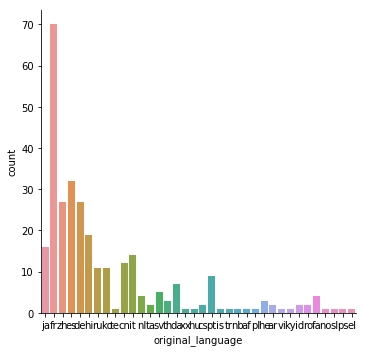

In [37]:
sns.catplot(x = "original_language", data = filmes_sem_lingua_original_ingles, kind="count")

#Refinando visualizações

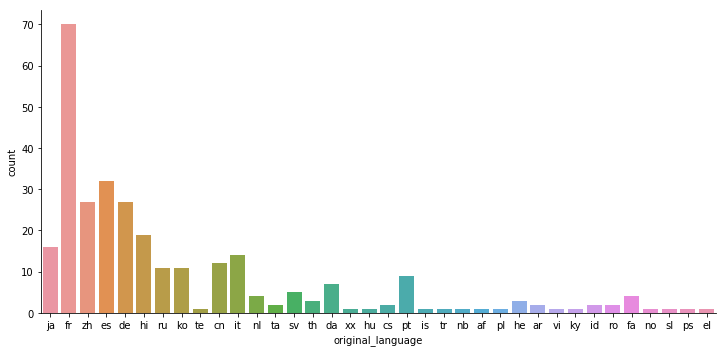

In [38]:
sns.catplot(x = "original_language", data = filmes_sem_lingua_original_ingles, kind="count", aspect=2)

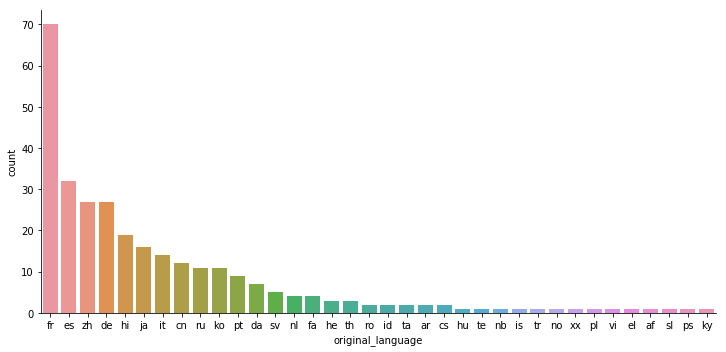

In [39]:
#Ordenação
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
sns.catplot(x = "original_language", data = filmes_sem_lingua_original_ingles, kind="count", aspect=2, order = total_por_lingua_de_outros_filmes.index)

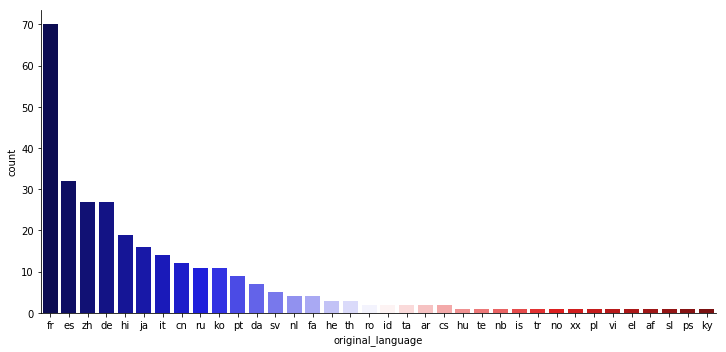

In [40]:
#Azuis *-*
sns.catplot(x = "original_language", data = filmes_sem_lingua_original_ingles, kind="count", aspect=2, order = total_por_lingua_de_outros_filmes.index, palette = "seismic")

#Estatística

In [42]:
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [48]:
notas_toy_story = notas.query("movieId == 1")
notas_do_jumanji = notas.query("movieId==2")
print(len(notas_toy_story), len(notas_do_jumanji))

215 110


In [52]:
#Imprimindo media notas
print("Nota média do Toy Story %.2f" % notas_toy_story.rating.mean())
print("Nota média do Jumanji %.2f" % notas_do_jumanji.rating.mean())
print("Mediana do Toy Story %.2f" % notas_toy_story.rating.median())
print("Mediana do Jumanji %.2f" % notas_do_jumanji.rating.median())

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43
Mediana do Toy Story 4.00
Mediana do Jumanji 3.50


In [0]:
#Quer saber se há uma estabilidade nas notas (muitas notas 3 e 2 por exemplo) ou instabilidade (1 e 5 por exemplo)
#Obstante a métrica utilizada, as duas tendências nos trazem a mesma informação nesse conjunto de dados. Entretanto, 
#sabemos que o comportamento em relação a esses dois filmes é bem diferente: no primeiro conjunto, 
#as pessoas parecem achar o filme razoavelmente bom; já no segundo, as pessoas estão amando ou odiando o filme.

{'boxes': [<matplotlib.lines.Line2D at 0x7fa0263638d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa02636f0f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa02636fac8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa02636f780>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa026363a20>,
  <matplotlib.lines.Line2D at 0x7fa02637a4e0>]}

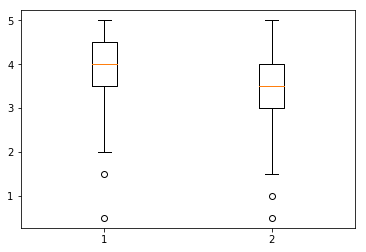

In [54]:
plt.boxplot([notas_toy_story.rating, notas_do_jumanji.rating])

In [0]:
#Podemos perceber, por exemplo, que não somente a mediana do Toy Story é maior (4,0 em comparação com os 3,5 do Jumanji), 
#como a distribuição das suas notas é superior, concentrando-se em valores mais altos.

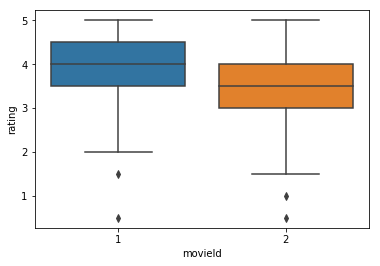

In [58]:
#Contudo, podemos pegar essas mesmas informações sem precisar filtrar primeiro
#Ou seja, nao precisa isolar os dois filmes
sns.boxplot(x = "movieId", y = "rating", data = notas.query("movieId in (1,2)"))

In [59]:
#desvio padrão
#Ler mais sobre isso
print("Desvio padrão do Jumanji %.2f" % notas_do_jumanji.rating.std(), "Desvio padrão do Toy Story %.2f" % notas_toy_story.rating.std())

Desvio padrão do Jumanji 0.88 Desvio padrão do Toy Story 0.83


In [0]:
from google.colab import drive
drive.mount('/content/drive')